# Clade Labelling

Development workbook for clade-labelling functions. 

### Input
 - a tree file, with some reference names embedded in there.
 - list of reference names

### Output
 - A dataframe with a list of tipnames, and their clade labels. 
 - (optional) A standard figure with a tree and a bar graph on the side showing the tip-to-nearest-ref distance
 - (optional) histogram of distances.

It's possible to not have a clade label if that tipname is too far away from even the nearest reference to be meaningfully determined to "belong" to that reference. 

Also note that `Bio.Phylo` will include quotation marks in the tipnames; Figtree doesn't do this.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection, LineCollection
import matplotlib.path as mpath
import matplotlib.lines as mlines
import seaborn as sns

import numpy as np
import pandas as pd
import os
os.chdir("/users/dten0001/Google Drive/baltic3/examples")
import sys
from functools import reduce
import subprocess
import time

# Set random state
my_randomstate = np.random.RandomState(12345)

import xio
import my_utils as xu
import biophylo_utils as bpu
import baltic3 as bt
import baltic3_utils as btu

from Bio import Phylo


In [2]:
tre = Phylo.read("H3_test_tree.nex", 'nexus')
#tree.root_at_midpoint()
#tree.ladderize()

names_ls = [x.name for x in tre.get_terminals()]
ref_names_ls = []
for nm in names_ls:
    if nm.split("|")[0] == "'A/H3N2":
        ref_names_ls.append(nm)

df = bpu.get_clade_labels(tre, ref_names_ls)

No. of reference tip names = 7
No. of non-reference tip names = 593
Done in 13.10s


In [7]:
df["clade_label_iso_name"] = df.apply(lambda row: str(row["clade_label"]).split("|")[1], axis=1)
for ln in list(set(df["clade_label_iso_name"])):
    print(ln)

A/Singapore/INFIMH-16-0019/2016
A/Victoria/361/2011
A/SouthAustralia/55/2014
A/SouthAustralia/30/2012
A/Stockholm/6/2014
A/Switzerland/9715293/2013
A/HongKong/4801/2014


In [4]:
# show baltic tree and bar chart
bt_tre = btu.austechia_read_tree("H3_test_tree.nex", date_delim="|")

Number of objects found in tree string: 1199

Tree height: 0.026984
Tree length: 1.004646
strictly bifurcating tree

Numbers of objects in tree: 1199 (599 nodes and 600 leaves)

Highest tip date: 2017.0082


In [5]:
branchWidth=0.5
track_width = 0.0065
track_x0 = bt_tre.treeHeight*1.1 # abs value of position of left side of left-most track
legend_h = 3
legend_w = 0.007
legend_x0 = -0.03
legend_y0 = 0 # x0 and y0 = top left corner
legend_fontsize = 12

s=10 # tip shape size

track_x = bt_tre.treeHeight*1.07

label_cdict = {"A/Singapore/INFIMH-16-0019/2016":"red", 
               'A/Victoria/361/2011':"blue",
              'A/Stockholm/6/2014':"green", 
              'A/Switzerland/9715293/2013':"purple", 
               'A/SouthAustralia/30/2012':"orange", 
              'A/HongKong/4801/2014':"cyan", 
              'A/SouthAustralia/55/2014':"grey"}

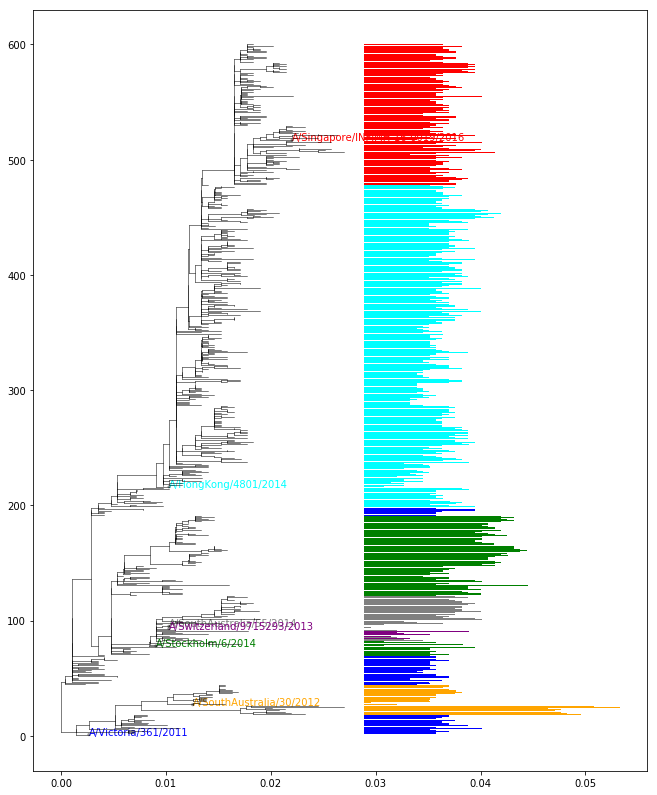

In [6]:
fig,ax = plt.subplots(figsize=(11,14),facecolor='w')

for k in bt_tre.Objects:
    c = 'k'
    x=k.height # raw (x, y) coords
    y=k.y

    xp = k.parent.height
    if x is None: # matplotlib won't plot Nones, like root
        x = 0
    if xp==None:
        xp = x

    if isinstance(k,bt.leaf) or k.branchType=='leaf':        
        # Draw horizontal bars
        if k.name.split("|")[0] != "A/H3N2":
            bar_width = df.loc[df["tip_name"]=="'"+k.name+"'"]["min_dist"].values[0]
            clade_label = df.loc[df["tip_name"]=="'"+k.name+"'"]["clade_label_iso_name"].values[0].replace("'", "")
            ax.plot([track_x, track_x+bar_width], [y, y], color=label_cdict[clade_label], lw=branchWidth*2)
        else:   
            # Demarcate ref locations
            ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11, alpha=0.4)
            ax.text(x, y, k.name.split("|")[1], color=label_cdict[k.name.split("|")[1]])

    elif isinstance(k,bt.node) or k.branchType=='node':
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],
                lw=branchWidth,
                color='k',
                ls='-',
                zorder=9)
    ax.plot([xp,x],[y,y],lw=branchWidth,color='k',ls='-',zorder=9)

plt.savefig("H3_test.pdf")
plt.show()

In [32]:
df = df.sort_values(by="clade_label_iso_name")
heatmap_cols = ['dist_to_'A/H3N2|A/Singapore/INFIMH-16-0019/2016|Singapore|2016-06-14'',
       'dist_to_'A/H3N2|A/HongKong/4801/2014|HongKong|2014'',
       'dist_to_'A/H3N2|A/SouthAustralia/55/2014|Australia|2014-06-29'',
       'dist_to_'A/H3N2|A/Switzerland/9715293/2013|Switzerland|2013-12-06'',
       'dist_to_'A/H3N2|A/Stockholm/6/2014|Sweden|2014-02-06'',
       'dist_to_'A/H3N2|A/SouthAustralia/30/2012|Australia|2012-05-10'',
       'dist_to_'A/H3N2|A/Victoria/361/2011|Australia|2011-10-24'',]

Index(['tip_name',
       'dist_to_'A/H3N2|A/Singapore/INFIMH-16-0019/2016|Singapore|2016-06-14'',
       'dist_to_'A/H3N2|A/HongKong/4801/2014|HongKong|2014'',
       'dist_to_'A/H3N2|A/SouthAustralia/55/2014|Australia|2014-06-29'',
       'dist_to_'A/H3N2|A/Switzerland/9715293/2013|Switzerland|2013-12-06'',
       'dist_to_'A/H3N2|A/Stockholm/6/2014|Sweden|2014-02-06'',
       'dist_to_'A/H3N2|A/SouthAustralia/30/2012|Australia|2012-05-10'',
       'dist_to_'A/H3N2|A/Victoria/361/2011|Australia|2011-10-24'',
       'clade_label', 'min_dist', 'clade_label_iso_name'],
      dtype='object')

In [30]:
df

tip_name  \
0    'H3N2|A/SouthAustralia/1014/2015|70685-HA|H3|S...   
329  'H3N2|A/SouthAustralia/9/2015|70557-HA|H3|SA/P...   
326  'H3N2|A/Perth/15/2015|70609-HA|H3|WA/Watermans...   
324  'H3N2|A/Victoria/853/2015|70678-HA|H3|VIC/StHe...   
322  'H3N2|A/Perth/51/2015|70687-HA|H3|WA/PortAlban...   
321  'H3N2|A/Brisbane/68/2016|70817-HA|H3|QLD/Yeppo...   
318  'H3N2|A/Brisbane/115/2015|70633-HA|H3|QLD/Bris...   
317  'H3N2|A/SouthAustralia/34/2016|70830-HA|H3|SA/...   
316  'H3N2|A/SouthAustralia/8/2013|70462-HA|H3|SA/S...   
314  'H3N2|A/Townsville/1001/2015|70578-HA|H3|QLD/C...   
330  'H3N2|A/Victoria/455/2015|70806-HA|H3|VIC/Viol...   
313  'H3N2|A/Canberra/3/2014|70491-HA|H3|ACT/Canber...   
308  'H3N2|A/Tasmania/1007/2015|70742-HA|H3|TAS/Ros...   
307  'H3N2|A/SouthAustralia/34/2015|70581-HA|H3|SA/...   
306  'H3N2|A/SouthAustralia/57/2015|70595-HA|H3|SA/...   
305  'H3N2|A/Victoria/16/2015|70662-HA|H3|VIC/Kew|2...   
303  'H3N2|A/Perth/33/2015|70616-HA|H3|WA/Perth|201...   
300  'H3N2|A/Victoria/64/2015|70773-HA|H3|VIC/Chero...   
299  'H3N2|A/Victoria/600/2016|70900-HA|H3|VIC/Chel...   
298  'H3N2|A/Brisbane/127/2015|70663-HA|H3|QLD/Bris...   
293  'H3N2|A/Victoria/536/2015|70658-HA|H3|VIC/Brig...   
311  'H3N2|A/Perth/31/2015|70615-HA|H3|WA/Cottesloe...   
291  'H3N2|A/Newcastle/190/2016|70925-HA|H3|NSW|201...   
332  'H3N2|A/Victoria/504/2013|70464-HA|H3|VIC/Nobl...   
338  'H3N2|A/Perth/40/2015|70618-HA|H3|WA/Geraldton...   
373  'H3N2|A/Brisbane/79/2015|70605-HA|H3|QLD/Brisb...   
372  'H3N2|A/Townsville/29/2015|70762-HA|H3|QLD/Tow...   
369  'H3N2|A/Brisbane/290/2016|70954-HA|H3|QLD/More...   
366  'H3N2|A/SouthAustralia/1005/2015|70644-HA|H3|S...   
364  'H3N2|A/Victoria/3036/2015|70745-HA|H3|VIC/For...   
..                                                 ...   
485  'H3N2|A/SouthAustralia/54/2012|70400-HA|H3|SA|...   
494  'H3N2|A/Canberra/35/2012|70424-HA|H3|ACT/Forde...   
112  'H3N2|A/Victoria/1002A/2012|70452-HA|H3|VIC|20...   
580  'H3N2|A/SouthAustralia/108/2012|70408-HA|H3|SA...   
334  'H3N2|A/Victoria/78/2012|70406-HA|H3|VIC|2012-...   
440  'H3N2|A/Victoria/50/2012|70405-HA|H3|VIC|2012-...   
565  'H3N2|A/Brisbane/1/2012|70382-HA|H3|QLD/GoldCo...   
418  'H3N2|A/Victoria/508/2012|70389-HA|H3|VIC/Melb...   
177  'H3N2|A/Victoria/43/2012|70402-HA|H3|VIC|2012-...   
215  'H3N2|A/Victoria/213/2012|70451-HA|H3|VIC|2012...   
20   'H3N2|A/Brisbane/14/2012|70385-HA|H3|QLD/Brisb...   
427  'H3N2|A/SouthAustralia/160/2012|70448-HA|H3|SA...   
533  'H3N2|A/SouthAustralia/157/2012|70445-HA|H3|SA...   
75   'H3N2|A/Perth/229/2012|70432-HA|H3|WA/Perth|20...   
531  'H3N2|A/Victoria/723/2012|70431-HA|H3|VIC/Berw...   
319  'H3N2|A/Tasmania/60/2012|70436-HA|H3|TAS/Latro...   
169  'H3N2|A/Brisbane/6/2012|70383-HA|H3|QLD/Brisba...   
139  'H3N2|A/Brisbane/21/2012|70386-HA|H3|QLD/Sunsh...   
554  'H3N2|A/Sydney/233/2012|70434-HA|H3|NSW/Hallid...   
233  'H3N2|A/Victoria/120/2012|70421-HA|H3|VIC|2012...   
320  'H3N2|A/SouthAustralia/2/2013|70455-HA|H3|SA/P...   
527  'H3N2|A/SouthAustralia/109/2012|70409-HA|H3|SA...   
186  'H3N2|A/Perth/153/2012|70447-HA|H3|WA/Armadale...   
559  'mixed|A/Victoria/92/2012|70414-HAb|H3|VIC|201...   
526  'H3N2|A/Victoria/535/2012|70404-HA|H3|VIC/Melb...   
72   'H3N2|A/Victoria/84/2012|70407-HA|H3|VIC|2012-...   
434  'H3N2|A/Victoria/710/2013|70457-HA|H3|VIC/Melb...   
520  'H3N2|A/Canberra/33/2012|70423-HA|H3|ACT/Griff...   
333  'H3N2|A/Sydney/245/2012|70444-HA|H3|NSW/Corrim...   
351  'H3N2|A/Darwin/1001/2012|70416-HA|H3|NT/Kather...   

     dist_to_'A/H3N2|A/Singapore/INFIMH-16-0019/2016|Singapore|2016-06-14'  \
0                                             0.014207                       
329                                           0.016659                       
326                                           0.015435                       
324                                           0.016056                       
322                                           0.010501     

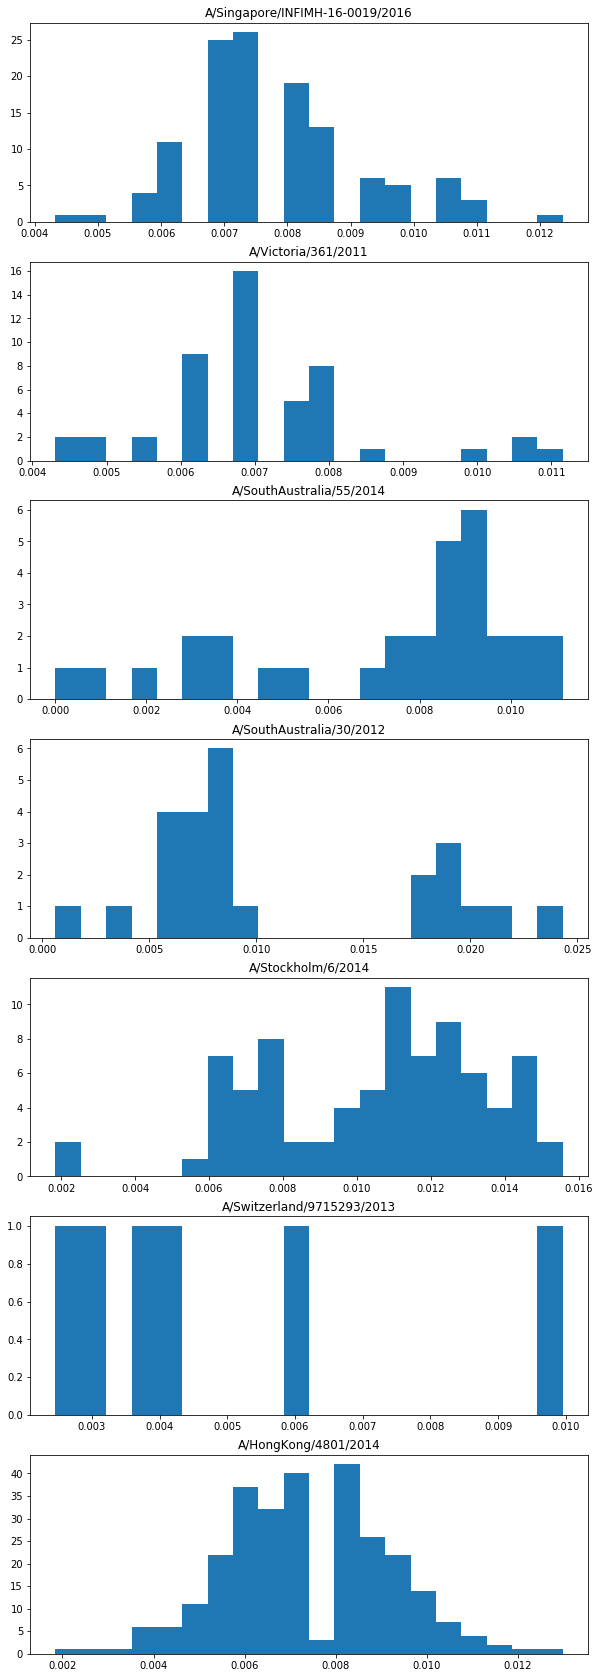

In [19]:
# Histograms
f, axarr = plt.subplots(7, figsize=(10, 30))

ls_temp = list(set(df["clade_label_iso_name"]))
for i in range(len(ls_temp)):
    
    d_temp = df.loc[df["clade_label_iso_name"]==ls_temp[i]]
    axarr[i].hist(list(d_temp["min_dist"]), bins=20)
    axarr[i].set_title(ls_temp[i])

In [12]:
df

tip_name  \
0    'H3N2|A/SouthAustralia/1014/2015|70685-HA|H3|S...   
1    'H3N2|A/Tasmania/28/2015|70646-HA|H3|TAS/Norwo...   
2    'H3N2|A/Victoria/528/2014|70515-HA|H3|VIC/Narr...   
3    'H3N2|A/Newcastle/12/2015|70608-HA|H3|NSW/Magi...   
4    'H3N2|A/Sydney/142/2016|70846-HA|H3|NSW/RopesC...   
5    'H3N2|A/Newcastle/1002/2015|70660-HA|H3|NSW/Ch...   
6    'H3N2|A/Brisbane/195/2015|70805-HA|H3|QLD/Gold...   
7    'H3N2|A/Sydney/1018/2016|70838-HA|H3|NSW/Milpe...   
8    'H3N2|A/Victoria/3073/2015|70741-HA|H3|VIC/Rin...   
9    'H3N2|A/Canberra/31/2014|70516-HA|H3|ACT/Canbe...   
10   'H3N2|A/Sydney/103/2014|70517-HA|H3|NSW/Macqua...   
11   'H3N2|A/Sydney/1065/2014|70549-HA|H3|NSW/Graft...   
12   'H3N2|A/Newcastle/63/2014|70526-HA|H3|NSW/Toma...   
13   'H3N2|A/SouthAustralia/1/2015|70556-HA|H3|SA/H...   
14   'H3N2|A/Canberra/93/2016|70938-HA|H3|ACT/Wannt...   
15   'H3N2|A/Victoria/2045/2016|70833-HA|H3|VIC|201...   
16   'H3N2|A/Brisbane/22/2015|70572-HA|H3|QLD/Brisb...   
17   'H3N2|A/Darwin/1002/2016|70901-HA|H3|NT/Darwin...   
18   'H3N2|A/Victoria/660/2016|70961-HA|H3|VIC/Cran...   
19   'H3N2|A/Sydney/1006/2015|70627-HA|H3|NSW/Yagoo...   
20   'H3N2|A/Brisbane/14/2012|70385-HA|H3|QLD/Brisb...   
21   'H3N2|A/Victoria/640/2015|70765-HA|H3|VIC/Berw...   
22   'H3N2|A/Tasmania/213/2016|70966-HA|H3|TAS/Fran...   
23   'H3N2|A/Victoria/7/2015|70631-HA|H3|VIC/Warrna...   
24   'H3N2|A/Newcastle/1001/2015|70643-HA|H3|NSW/Pr...   
25   'H3N2|A/Townsville/12/2015|70594-HA|H3|QLD/Tow...   
26   'H3N2|A/Canberra/5/2012|70401-HA|H3|ACT/Melbou...   
27   'H3N2|A/Victoria/2097/2016|70886-HA|H3|VIC|201...   
28   'H3N2|A/Victoria/901/2015|70559-HA|H3|VIC/Nort...   
29   'H3N2|A/Victoria/3009/2015|70754-HA|H3|VIC/Gle...   
..                                                 ...   
563  'H3N2|A/Sydney/500/2015|70570-HA|H3|NSW/BondiB...   
564  'H3N2|A/Victoria/70/2016|70874-HA|H3|VIC/Prahr...   
565  'H3N2|A/Brisbane/1/2012|70382-HA|H3|QLD/GoldCo...   
566  'H3N2|A/Victoria/862/2015|70679-HA|H3|VIC/Heal...   
567  'H3N2|A/Sydney/10/2015|70567-HA|H3|NSW/Liverpo...   
568  'H3N2|A/Victoria/21/2015|70701-HA|H3|VIC/Kew|2...   
569  'H3N2|A/Sydney/1010/2015|70696-HA|H3|NSW/Malve...   
570  'H3N2|A/Sydney/1007/2014|70520-HA|H3|NSW/Colla...   
571  'H3N2|A/Tasmania/1014/2015|70709-HA|H3|TAS/Ros...   
572  'H3N2|A/SouthAustralia/119/2015|70747-HA|H3|SA...   
573  'H3N2|A/SouthAustralia/41/2016|70829-HA|H3|SA/...   
574  'H3N2|A/SouthAustralia/1002/2014|70507-HA|H3|S...   
575  'H3N2|A/Victoria/148/2012|70425-HA|H3|VIC|2012...   
576  'H3N2|A/Sydney/195/2012|70440-HA|H3|NSW/Sydney...   
577  'H3N2|A/Sydney/53/2015|70681-HA|H3|NSW/Sydney|...   
578  'H3N2|A/Perth/92/2015|70743-HA|H3|WA/Oldbury|2...   
579  'H3N2|A/Sydney/1014/2013|70475-HA|H3|NSW/Coffs...   
580  'H3N2|A/SouthAustralia/108/2012|70408-HA|H3|SA...   
581  'H3N2|A/Victoria/673/2014|70545-HA|H3|VIC/Rowv...   
582  'H3N2|A/Brisbane/27/2012|70387-HA|H3|QLD/Brisb...   
583  'H3N2|A/Victoria/48/2015|70723-HA|H3|VIC/Donca...   
584  'H3N2|A/Tasmania/24/2016|70894-HA|H3|TAS/North...   
585  'H3N2|A/Newcastle/201/2016|70935-HA|H3|NSW/Inv...   
586  'H3N2|A/Victoria/5065/2014|70542-HA|H3|VIC/Haw...   
587  'H3N2|A/SouthAustralia/111/2012|70410-HA|H3|SA...   
588  'H3N2|A/SouthAustralia/164/2016|70969-HA|H3|SA...   
589  'H3N2|A/Sydney/242/2015|70798-HA|H3|NSW/Claymo...   
590  'H3N2|A/Victoria/640/2013|70474-HA|H3|VIC/Sout...   
591  'H3N2|A/Sydney/1092/2016|70906-HA|H3|NSW/Rockd...   
592  'H3N2|A/SouthAustralia/70/2015|70611-HA|H3|SA/...   

     dist_to_'A/H3N2|A/Singapore/INFIMH-16-0019/2016|Singapore|2016-06-14'  \
0                                             0.014207                       
1                                             0.032109                       
2                                             0.029028                       
3                                             0.009265                       
4                                             0.033346     